In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def modeling_parameters(model):
    parameters = model.get_params()
    
    param_dict = { 'model' + '__' + key : [value]\
              for key,value in zip(parameters.keys(),parameters.values())
                 }
    return param_dict

def benchmark_model(gridsearch,X_train,X_test,y_train,y_test):
    
    print()
    
    print(f'Baseline Score:\n{y_test.value_counts(normalize=True)}')
    print()
    print(f'GridSearch Best Score: {gridsearch.best_score_}')
    print()
    print(f'GridSearch Best Parameters:')
    display(gridsearch.best_params_)
    print()
    print(f'GridSearch Training Score: {gridsearch.score(X_train, y_train)}')
    print()
    print(f'GridSearch Testing Score: {gridsearch.score(X_test, y_test)}')

In [3]:
df = pd.read_csv('data/modeling_aapl.csv')
df.set_index('Unnamed: 0',inplace=True)
df.index.rename('adjusted_date',inplace=True)

In [4]:
df['target'] = [0 if i <= 0 else 1 for i in df['Close']] 

In [5]:
df.head(1)

,date,title,text,new_date,day,Open,High,Low,Close,Volume,target
adjusted_date,,,,,,,,,,,
2020-07-31,"Aug. 1, 2020 6:21 PM ET",Apple Amazon Microsoft Google and Facebook con...,Five stocks Microsoft Apple Amazon Facebook ...,2020-08-01,5,0.019498,0.013499,0.018043,0.0092,200737840.0,1


In [6]:
X = df[['text','Volume']]
y = df['target']

In [7]:
sc = StandardScaler()
X['volume_value']= sc.fit_transform(X[['Volume']])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=1)
cvec = CountVectorizer(stop_words='english',
                       max_features=2000,
                       max_df=0.9,
                       min_df=2,
                       ngram_range=(1,1))
cvec.fit(X_train['text'])
X_train_vec = cvec.transform(X_train['text'])
X_test_vec = cvec.transform(X_test['text'])
X_train_vec_df = pd.DataFrame(X_train_vec.toarray(),
                          columns=cvec.get_feature_names(),index=X_train.index)
X_test_vec_df =  pd.DataFrame(X_test_vec.toarray(),
                          columns=cvec.get_feature_names(),index=X_test.index)
#X_train_vec_df['volume_value'] = X_train['volume_value']
#X_test_vec_df['volume_value'] = X_test['volume_value']
X_train_rdy = X_train_vec_df
X_test_rdy = X_test_vec_df

/Users/zakz/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X_train_rdy.shape

(64, 1135)

In [9]:
X_test_rdy.shape

(22, 1135)

In [21]:
model = Sequential()
model.add(Dense(16,
                input_shape=(X_train_rdy.shape[1],),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [24]:
history = model.fit(X_train_rdy, y_train, validation_data=(X_test_rdy, y_test), epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 21ms/step - loss: 0.2490 - accuracy: 1.0000 - val_loss: 0.6522 - val_accuracy: 0.7273
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2245 - accuracy: 1.0000 - val_loss: 0.6491 - val_accuracy: 0.7273
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2027 - accuracy: 1.0000 - val_loss: 0.6471 - val_accuracy: 0.7273
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1840 - accuracy: 1.0000 - val_loss: 0.6456 - val_accuracy: 0.7273
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1668 - accuracy: 1.0000 - val_loss: 0.6423 - val_accuracy: 0.7273
Epoch 6/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1509 - accuracy: 1.0000 - val_loss: 0.6395 - val_accuracy: 0.7273
Epoch 7/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1377 - accuracy: 1.0000 - val_loss: 0.6357 - val_accuracy: 0.7273
Epoch 8/20
2/2 [=================

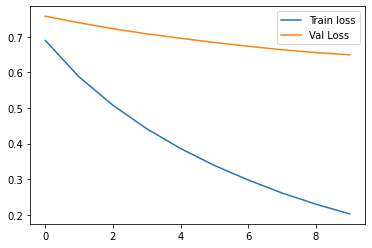

In [45]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

In [ ]:
history.

In [12]:
benchmark_model(gs,X_train,X_test,y_train,y_test)

Baseline Score:
1    0.590909
0    0.409091
Name: target, dtype: float64

GridSearch Best Score: 0.6730769230769231

GridSearch Best Parameters:


{'cvec__max_df': 0.95,
 'cvec__max_features': 2000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_impurity_split': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}


GridSearch Training Score: 1.0

GridSearch Testing Score: 0.7272727272727273
